### Milestone 3: Data Exploration and Preliminary Modeling

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Load data
file_path = './data/NYC_Weather_2022-2024.csv'
nyc_weather_data = pd.read_csv(file_path)

nyc_weather_data

,STATION,NAME,DATE,AWND,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,...,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT11
0,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-01,NaN,NaN,NaN,NaN,1.05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-02,NaN,NaN,NaN,NaN,0.00,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-03,NaN,NaN,NaN,NaN,0.09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-04,NaN,NaN,NaN,NaN,0.50,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-07,NaN,NaN,NaN,NaN,1.38,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66278,US1NJHD0023,"JERSEY CITY 1.6 NNE, NJ US",2024-11-26,NaN,NaN,NaN,NaN,0.10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66279,US1NJHD0023,"JERSEY CITY 1.6 NNE, NJ US",2024-11-27,NaN,NaN,NaN,NaN,0.07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66280,US1NJHD0023,"JERSEY CITY 1.6 NNE, NJ US",2024-11-28,NaN,NaN,NaN,NaN,0.97,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66281,US1NJHD0023,"JERSEY CITY 1.6 NNE, NJ US",2024-11-30,NaN,NaN,NaN,NaN,0.00,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Step 1: Data Preprocessing

In [3]:
# Select relevant features
relevant_columns = ['DATE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'AWND', 'WDF2', 'WESF', 'WESD']
weather_subset = nyc_weather_data[relevant_columns].copy()

weather_subset

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,AWND,WDF2,WESF,WESD
0,2022-12-01,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-02,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-12-03,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-12-04,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-12-07,1.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
66278,2024-11-26,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66279,2024-11-27,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66280,2024-11-28,0.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66281,2024-11-30,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Convert 'DATE' to datetime format
weather_subset['DATE'] = pd.to_datetime(weather_subset['DATE'])

# Fill missing values with the median
weather_subset.fillna(weather_subset.median(numeric_only=True), inplace=True)

weather_subset

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,AWND,WDF2,WESF,WESD
0,2022-12-01,1.05,0.0,0.0,65.0,47.0,7.16,220.0,0.0,0.0
1,2022-12-02,0.00,0.0,0.0,65.0,47.0,7.16,220.0,0.0,0.0
2,2022-12-03,0.09,0.0,0.0,65.0,47.0,7.16,220.0,0.0,0.0
3,2022-12-04,0.50,0.0,0.0,65.0,47.0,7.16,220.0,0.0,0.0
4,2022-12-07,1.38,0.0,0.0,65.0,47.0,7.16,220.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
66278,2024-11-26,0.10,0.0,0.0,65.0,47.0,7.16,220.0,0.0,0.0
66279,2024-11-27,0.07,0.0,0.0,65.0,47.0,7.16,220.0,0.0,0.0
66280,2024-11-28,0.97,0.0,0.0,65.0,47.0,7.16,220.0,0.0,0.0
66281,2024-11-30,0.00,0.0,0.0,65.0,47.0,7.16,220.0,0.0,0.0


In [5]:
# Separate the 'DATE' column
date_column = weather_subset['DATE']
weather_numeric = weather_subset.drop(columns=['DATE'])

# Normalize numerical features
scaler = StandardScaler()
weather_scaled = scaler.fit_transform(weather_numeric)

# Recombine 'DATE' with the scaled data
weather_scaled_df = pd.DataFrame(weather_scaled, columns=weather_numeric.columns)
weather_scaled_df.insert(0, 'DATE', date_column.reset_index(drop=True))

# Verify the scaled data
weather_scaled_df.head()

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,AWND,WDF2,WESF,WESD
0,2022-12-01,2.133103,-0.06785,-0.07761,0.01009,-0.026203,-0.037266,0.02627,-0.044179,-0.037374
1,2022-12-02,-0.370117,-0.06785,-0.07761,0.01009,-0.026203,-0.037266,0.02627,-0.044179,-0.037374
2,2022-12-03,-0.155555,-0.06785,-0.07761,0.01009,-0.026203,-0.037266,0.02627,-0.044179,-0.037374
3,2022-12-04,0.821893,-0.06785,-0.07761,0.01009,-0.026203,-0.037266,0.02627,-0.044179,-0.037374
4,2022-12-07,2.919830,-0.06785,-0.07761,0.01009,-0.026203,-0.037266,0.02627,-0.044179,-0.037374


#### Step 2: Data Visualization

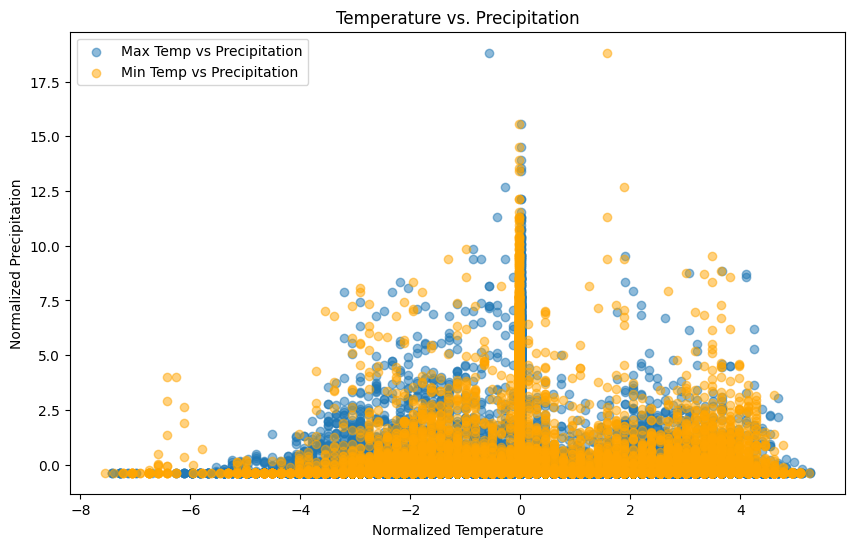

In [6]:
# Scatter plot: Temperature vs. Precipitation
plt.figure(figsize=(10, 6))
plt.scatter(weather_scaled_df['TMAX'], weather_scaled_df['PRCP'], alpha=0.5, label='Max Temp vs Precipitation')
plt.scatter(weather_scaled_df['TMIN'], weather_scaled_df['PRCP'], alpha=0.5, label='Min Temp vs Precipitation', color='orange')
plt.title("Temperature vs. Precipitation")
plt.xlabel("Normalized Temperature")
plt.ylabel("Normalized Precipitation")
plt.legend()
plt.show()

- Higher precipitation values do not necessarily correlate with extreme temperatures.

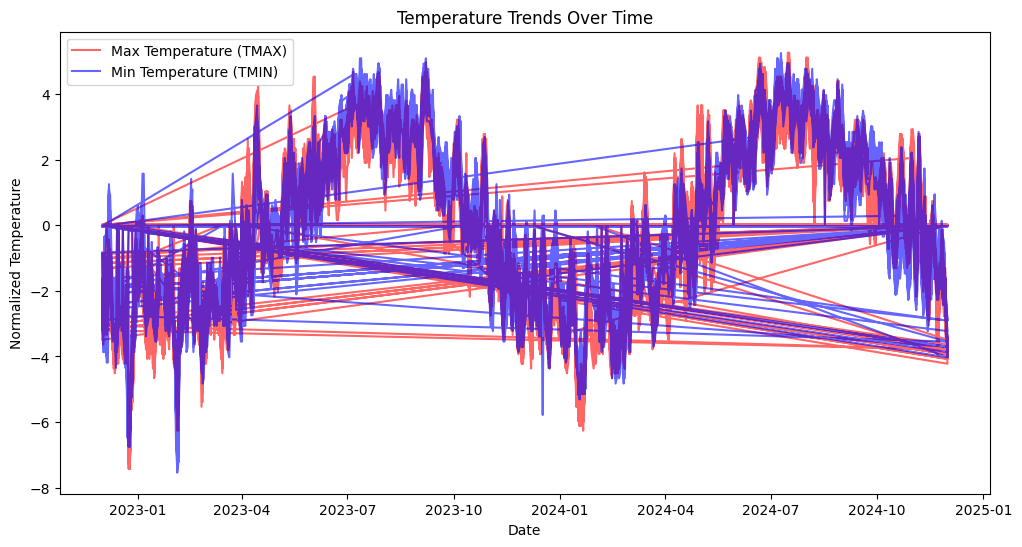

In [7]:
# Line Plot: Temperature Trends Over Time
plt.figure(figsize=(12, 6))
plt.plot(weather_scaled_df['DATE'], weather_scaled_df['TMAX'], label='Max Temperature (TMAX)', alpha=0.6, color='red')
plt.plot(weather_scaled_df['DATE'], weather_scaled_df['TMIN'], label='Min Temperature (TMIN)', alpha=0.6, color='blue')
plt.title("Temperature Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Normalized Temperature")
plt.legend()
plt.show()

- Line plots show the normalized maximum (TMAX) and minimum (TMIN) temperatures across the dataset period.
- Seasonal patterns are visible, with temperature fluctuations peaking in summer months and dropping in winter.

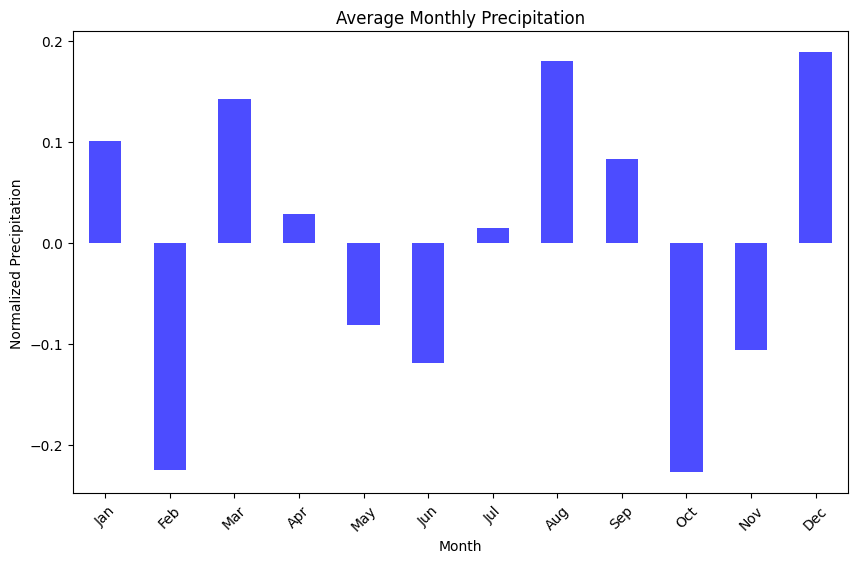

In [8]:
# Bar Plot: Average Monthly Precipitation
weather_scaled_df['Month'] = weather_scaled_df['DATE'].dt.month
monthly_precipitation = weather_scaled_df.groupby('Month')['PRCP'].mean()

plt.figure(figsize=(10, 6))
monthly_precipitation.plot(kind='bar', color='blue', alpha=0.7)
plt.title("Average Monthly Precipitation")
plt.xlabel("Month")
plt.ylabel("Normalized Precipitation")
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

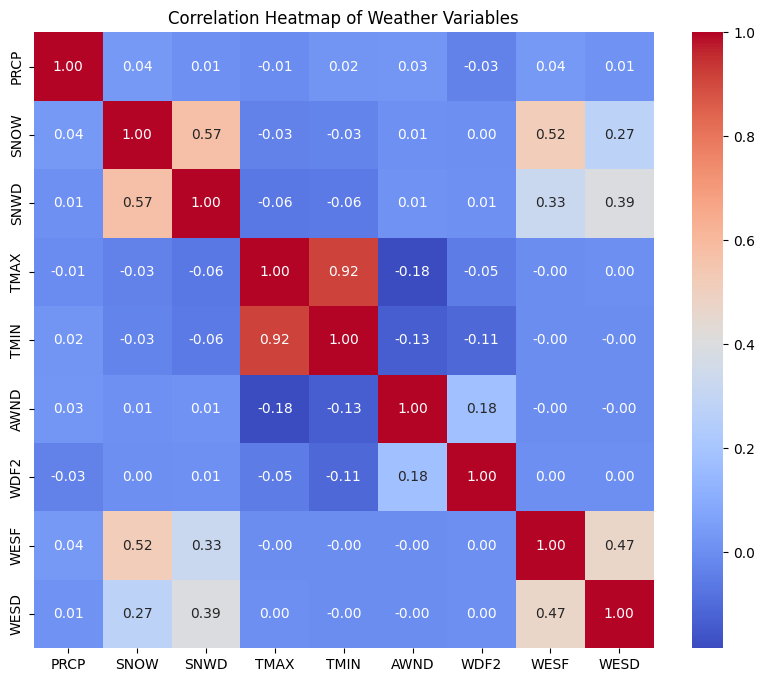

In [9]:
# Heatmap: Correlation Between Variables
correlation_matrix = weather_scaled_df.drop(columns=['DATE', 'Month']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Weather Variables")
plt.show()

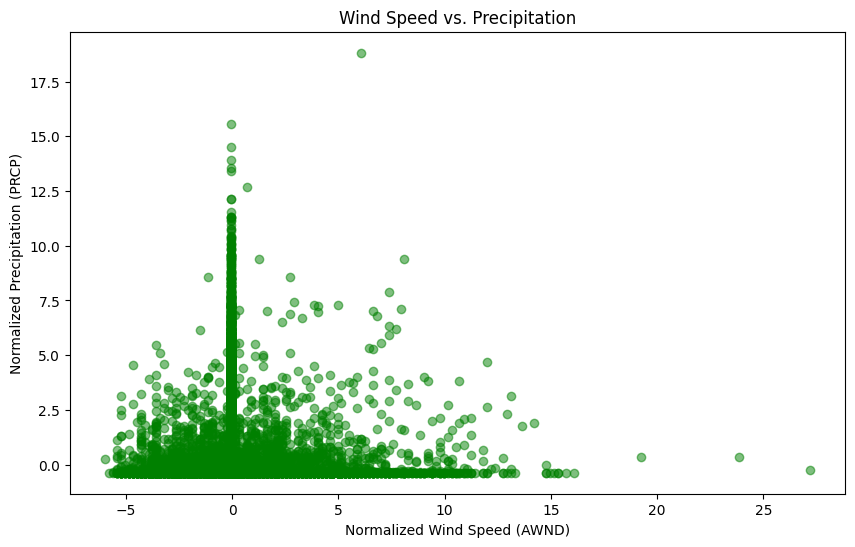

In [10]:
# Scatter Plot: Wind Speed vs. Precipitation
plt.figure(figsize=(10, 6))
plt.scatter(weather_scaled_df['AWND'], weather_scaled_df['PRCP'], alpha=0.5, color='green')
plt.title("Wind Speed vs. Precipitation")
plt.xlabel("Normalized Wind Speed (AWND)")
plt.ylabel("Normalized Precipitation (PRCP)")
plt.show()

#### Step 3: Preliminary Modeling

In [11]:
# Features and Target
X = weather_scaled_df[['PRCP', 'TMIN', 'SNOW', 'AWND', 'WDF2', 'WESF', 'WESD']] 
y = weather_scaled_df['TMAX'] 

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.15197220426265945


In [12]:
# Features and target
X = weather_scaled_df[['PRCP', 'TMIN', 'SNOW', 'AWND', 'WDF2', 'WESF', 'WESD']]
y = weather_scaled_df['TMAX']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred)
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest Mean Squared Error: 0.12770234794221735
